In [250]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from seaborn import load_dataset
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
#Reading the penguins dataset into the dataframe df. Displaying the top 5 rows.
df=load_dataset('penguins')
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [252]:
#Converting datafrane into a csv
df.to_csv('data/penguins.csv')

In [253]:
#Showing number of rows
df.shape[0]

344

In [254]:
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [255]:
#Cleaning data 
df=df.dropna()

In [256]:
df.count()

species              333
island               333
bill_length_mm       333
bill_depth_mm        333
flipper_length_mm    333
body_mass_g          333
sex                  333
dtype: int64

In [257]:
#Splitting columns
X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y = df['species']

In [258]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [259]:
#The describe method will provide statistics such as count, mean, 
#std (standard deviation), min, 25%, 50%, 75%, and max for each numerical column in the DataFrame.
# The "min" and "max" values represent the range of values in each column.
# You can inspect these values to understand the distribution and variability of the data.
X.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [260]:
#Splitting data
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2 , random_state=428)

In [261]:
clf=KNeighborsClassifier()

param_grid = {'n_neighbors' : [3,5,7, 9, 11, 13]}
search = GridSearchCV(estimator = clf,
param_grid = param_grid,
cv = 5,
scoring='accuracy',
return_train_score = False,
verbose=1)

clf = search.fit(x_train, y_train)
print(clf.best_params_)
print('Best Cross Validation Accuracy Score')

print(clf.best_score_*100)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_neighbors': 3}
Best Cross Validation Accuracy Score
75.9329140461216


In [262]:
y_pred=clf.predict(x_test)
print('Accuracy = ',  accuracy_score(y_test,y_pred))

Accuracy =  0.835820895522388


[Text(0, 0.5, 'Adelie'), Text(0, 1.5, 'Chinstrap'), Text(0, 2.5, 'Gentoo')]

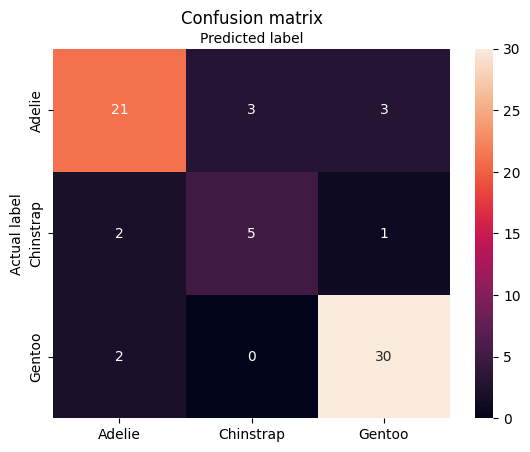

In [263]:
#Visualizing the performeance
confMatrix = confusion_matrix(y_test, y_pred)

# create heatmap
ax = sns.heatmap(pd.DataFrame(confMatrix), annot=True, fmt = 'g')
ax.xaxis. set_label_position("top")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(df['species'].unique())
ax.yaxis.set_ticklabels(df['species'].unique())

In [264]:
#Scaling training and test datasets using zero mean and unit variance
scaler  = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)



In [265]:
print(x_train_scaled.mean(axis=0))
print(x_test_scaled.mean(axis=0))

[ 4.84157409e-16  1.43160337e-15 -2.83816412e-16  1.30221648e-16]
[ 2.29004212e-15 -2.03692784e-15  2.61813788e-16  3.01582971e-16]


In [266]:
clf=KNeighborsClassifier()
clf.fit(x_train_scaled,y_train)
y_pred=clf.predict(x_test_scaled)

In [267]:
print('Accuracy = ',  accuracy_score(y_test,y_pred))

Accuracy =  0.9850746268656716


[Text(0, 0.5, 'Adelie'), Text(0, 1.5, 'Chinstrap'), Text(0, 2.5, 'Gentoo')]

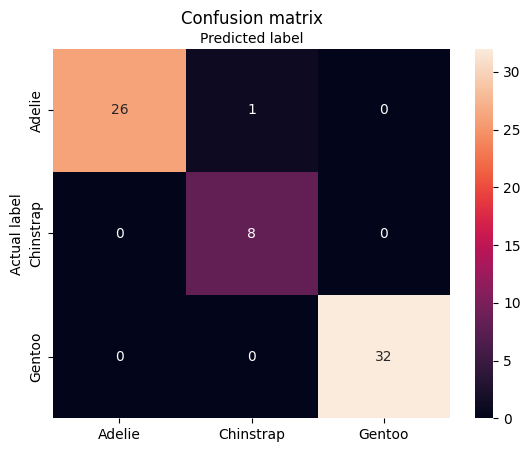

In [268]:
#Visualizing the performeance
confMatrix = confusion_matrix(y_test, y_pred)

# create heatmap
ax = sns.heatmap(pd.DataFrame(confMatrix), annot=True, fmt = 'g')
ax.xaxis. set_label_position("top")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(df['species'].unique())
ax.yaxis.set_ticklabels(df['species'].unique())